In [23]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential

In [2]:
num_classes = 10
input_size = (28, 28, 1)

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
import matplotlib.pyplot as plt

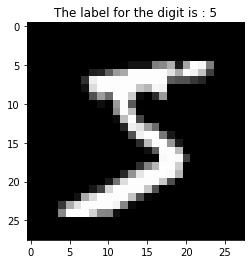

In [6]:
# Visualize the first image
plt.imshow(x_train[0], cmap=plt.get_cmap('gray'))
plt.title(f"The label for the digit is : {y_train[0]}")
plt.show()

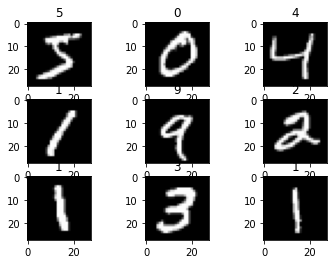

In [15]:
for i in range(9):
  plt.subplot(330 + 1 + i)
  plt.imshow(x_train[i], cmap= plt.get_cmap('gray'))
  plt.title(f"{y_train[i]}")

plt.show()

In [16]:
x_train.shape

(60000, 28, 28)

In [17]:
x_train[0].shape

(28, 28)

In [18]:
#Normalize the dataset, as it contains values from 1 to 255

x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

In [19]:
#Change the shape of the dataset

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print(x_train.shape)
print(x_train[0].shape)

(60000, 28, 28, 1)
(28, 28, 1)


In [20]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [21]:
batch_size = 128
num_classes = 10
epochs = 25

In [24]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

In [28]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_size))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               2359552   
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)              

In [30]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [31]:
hist = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
print("The model has successfully trained")

Epoch 1/25
469/469 [==============================] - 48s 10ms/step - loss: 0.4087 - accuracy: 0.8686 - val_loss: 0.0540 - val_accuracy: 0.9812
Epoch 2/25
469/469 [==============================] - 4s 9ms/step - loss: 0.0667 - accuracy: 0.9797 - val_loss: 0.0329 - val_accuracy: 0.9898
Epoch 3/25
469/469 [==============================] - 4s 9ms/step - loss: 0.0478 - accuracy: 0.9844 - val_loss: 0.0285 - val_accuracy: 0.9907
Epoch 4/25
469/469 [==============================] - 4s 9ms/step - loss: 0.0399 - accuracy: 0.9881 - val_loss: 0.0300 - val_accuracy: 0.9906
Epoch 5/25
469/469 [==============================] - 4s 9ms/step - loss: 0.0332 - accuracy: 0.9892 - val_loss: 0.0249 - val_accuracy: 0.9919
Epoch 6/25
469/469 [==============================] - 4s 9ms/step - loss: 0.0253 - accuracy: 0.9917 - val_loss: 0.0245 - val_accuracy: 0.9912
Epoch 7/25
469/469 [==============================] - 4s 9ms/step - loss: 0.0219 - accuracy: 0.9926 - val_loss: 0.0268 - val_accuracy: 0.9923
Epoc

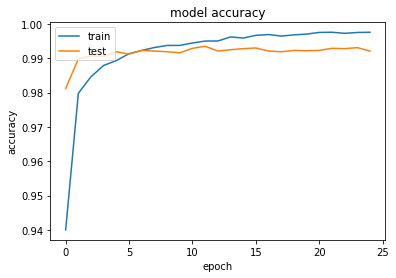

In [44]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [32]:
model.save('mnist.h5')
print("Saving the model as mnist.h5")

Saving the model as mnist.h5


In [33]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.03451715037226677
Test accuracy: 0.9921000003814697


In [34]:
prediction_probability = model.predict(x_test)
prediction = np.array([np.argmax(pred) for pred in prediction_probability])

In [37]:
prediction

array([7, 2, 1, ..., 4, 5, 6])

In [38]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [41]:
y_actual = np.argmax(y_test, axis=1)
y_actual

array([7, 2, 1, ..., 4, 5, 6])

In [42]:
from sklearn.metrics import classification_report

print(classification_report(y_actual, prediction))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [66]:
def predict_digit(img):
  img = img.reshape(1,28,28,1)
  
  res = model.predict([img])[0]
  return np.argmax(res), max(res), res

In [67]:
sample_img = x_test[45]
sample_img.shape

(28, 28, 1)

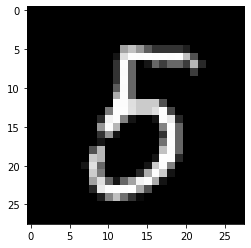

In [68]:
plt.imshow(sample_img.reshape(28,28), cmap=plt.get_cmap('gray'))
plt.show()

In [69]:
pred_val, prob, res = predict_digit(sample_img)
pred_val

5

In [70]:
prob

1.0

In [71]:
res

array([1.4658031e-17, 3.2517642e-18, 1.5737794e-22, 2.3010040e-11,
       9.0307948e-25, 1.0000000e+00, 1.1611067e-12, 1.4724932e-19,
       5.2560178e-16, 1.0835665e-14], dtype=float32)